<a href="https://colab.research.google.com/github/edmenciab733/clases/blob/main/redes_neuronales_hola_mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

Enlace: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [70]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [71]:

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [75]:
x_train.shape

(60000, 28, 28)

In [68]:
x_train[0].shape

(28, 28)

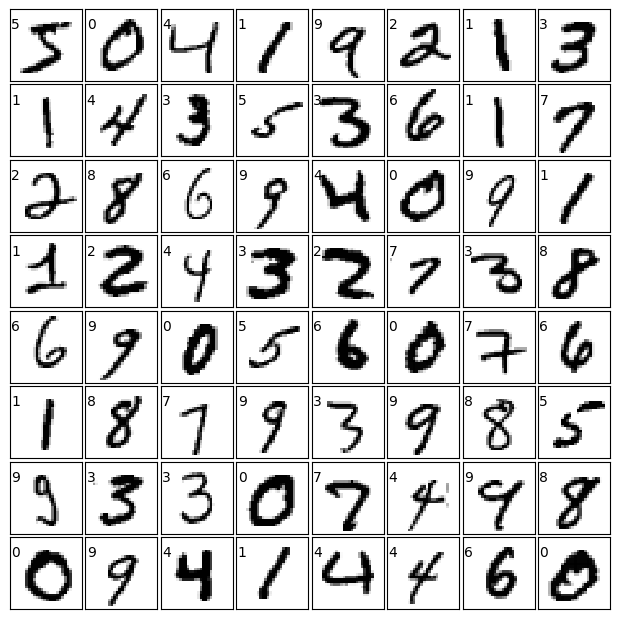

In [53]:
fig = plt.figure(figsize=(6, 6)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# plot the digits: each image is 8x8 pixels
for i in range(64):
  ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(x_train[i], cmap=plt.cm.binary, interpolation='nearest')
  # label the image with the target value
  ax.text(0, 7, str(y_train[i]))

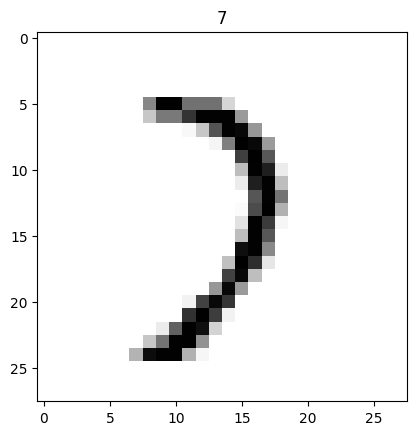

In [58]:
index =140
plt.title(y_train[index])
plt.imshow(x_train[index],  cmap=plt.cm.binary, interpolation='nearest')
plt.show()

In [62]:
x_train = x_train/255.0
y_test = y_test/255.0

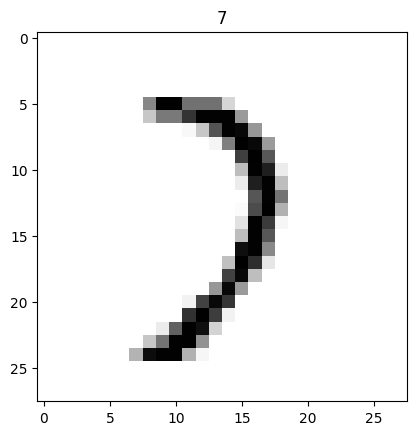

In [63]:
index =140
plt.title(y_train[index])
plt.imshow(x_train[index],  cmap=plt.cm.binary, interpolation='nearest')
plt.show()

In [84]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [92]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(100, activation='relu'),
                              tf.keras.layers.Dropout(0.10),
                             tf.keras.layers.Dense(10, activation='softmax')])

In [97]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 3.7383 - accuracy: 0.7531 - val_loss: 0.6653 - val_accuracy: 0.8377
Epoch 2/10
750/750 [==============================] - 5s 6ms/step - loss: 0.6233 - accuracy: 0.8456 - val_loss: 0.4728 - val_accuracy: 0.8860
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4540 - accuracy: 0.8829 - val_loss: 0.3802 - val_accuracy: 0.9176
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3770 - accuracy: 0.9004 - val_loss: 0.3323 - val_accuracy: 0.9257
Epoch 5/10
750/750 [==============================] - 5s 6ms/step - loss: 0.3437 - accuracy: 0.9090 - val_loss: 0.3110 - val_accuracy: 0.9279
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3174 - accuracy: 0.9152 - val_loss: 0.2955 - val_accuracy: 0.9388
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2875 - accuracy: 0.9219 - val_loss: 0.2636 - val_accuracy: 0.9402
Epoch 

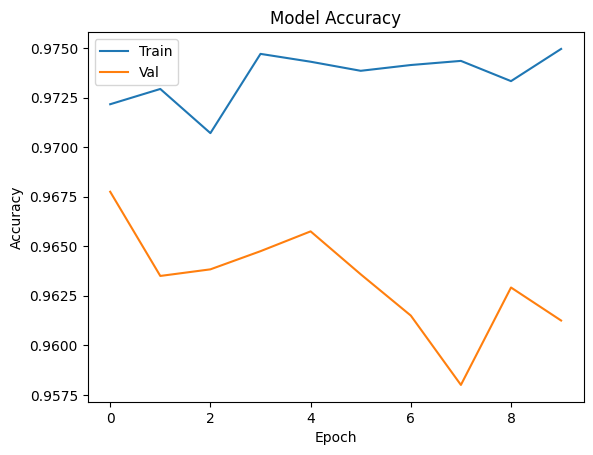

In [93]:
plot_acc(history)

In [98]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2583 - accuracy: 0.9425


[0.2583170533180237, 0.9424999952316284]

In [117]:
predicciones = model.predict(x_test)
y_pred = np.argmax(predicciones, axis=1)

313/313 [==============================] - 2s 5ms/step


In [118]:
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.94      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.95      0.94      0.95       982
           5       0.96      0.90      0.93       892
           6       0.95      0.96      0.96       958
           7       0.99      0.90      0.94      1028
           8       0.87      0.95      0.91       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [120]:
errores = np.where(y_pred != y_test)[0]
errores

array([  18,   77,   80,   97,  115,  149,  151,  217,  233,  241,  245,
        247,  255,  259,  300,  320,  321,  340,  352,  358,  366,  404,
        406,  445,  448,  457,  460,  468,  478,  495,  502,  508,  522,
        543,  551,  582,  610,  619,  629,  654,  659,  673,  707,  717,
        720,  726,  740,  810,  829,  839,  874,  881,  898,  938,  944,
        950,  956,  965,  982,  990, 1014, 1022, 1039, 1044, 1055, 1073,
       1082, 1089, 1107, 1112, 1114, 1119, 1124, 1143, 1147, 1156, 1164,
       1166, 1178, 1182, 1191, 1194, 1204, 1209, 1216, 1226, 1228, 1232,
       1242, 1247, 1251, 1256, 1260, 1272, 1289, 1299, 1325, 1326, 1328,
       1378, 1393, 1411, 1414, 1436, 1467, 1476, 1500, 1522, 1530, 1549,
       1553, 1554, 1559, 1571, 1587, 1595, 1609, 1611, 1621, 1670, 1671,
       1678, 1681, 1696, 1709, 1718, 1721, 1751, 1754, 1755, 1762, 1790,
       1800, 1809, 1828, 1878, 1883, 1885, 1901, 1903, 1930, 1941, 1952,
       1969, 1970, 1982, 1987, 2016, 2024, 2028, 20

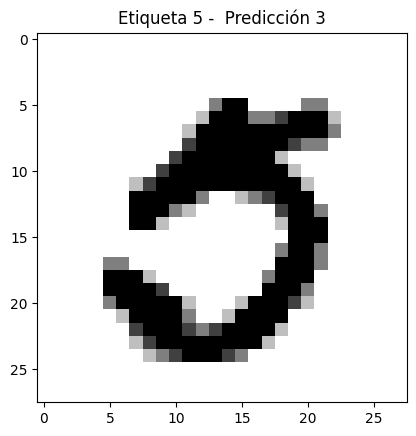

In [130]:
index =9719
plt.title("Etiqueta {} -  Predicción {}".format(y_test[index], y_pred[index]))

plt.imshow(x_test[index],  cmap=plt.cm.binary, interpolation='nearest')
plt.show()